<a href="https://colab.research.google.com/github/rizky-gumelar/Workshop-LSP/blob/main/Simulasi_Workshop_LSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **WORKSHOP LSP Associate Data Science**

---


 Nama : Rizky Syah Gumelar

 NIM : A11.2021.13304

 Link Youtube : https://youtu.be/yjRY0stTB5U


---


 Link dataset: https://archive.ics.uci.edu/dataset/82/post+operative+patient


In [ ]:
# Menyambungkan google colab dengan google drive untuk memasukkan dataset
from google.colab import drive # library untuk mengakses Google Drive dari Google Colab.
drive.mount('/content/drive') # mount Google Drive agar file di dalamnya dapat diakses.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # untuk komputasi numerik (matematika, array, statistik).
import pandas as pd # untuk manipulasi dan analisis data dalam format tabel.
import matplotlib.pyplot as plt # visualisasi data (grafik dasar seperti garis, batang).
import seaborn as sns # visualisasi statistik yang lebih menarik dan informatif.

Deskripsi Data

 https://archive.ics.uci.edu/dataset/82/post+operative+patient

1. Title: Postoperative Patient Data

2. Source Information:
   -- Creators: Sharon Summers, School of Nursing, University of Kansas
                Medical Center, Kansas City, KS 66160
                Linda Woolery, School of Nursing, University of Missouri,
                Columbia, MO 65211
   -- Donor:    Jerzy W. Grzymala-Busse (jerzy@cs.ukans.edu) (913)864-4488
   -- Date:     June 1993

3. Past Usage:
   1. A. Budihardjo, J. Grzymala-Busse, L. Woolery (1991). Program LERS_LB 2.5
      as a tool for knowledge acquisition in nursing, Proceedings of the 4th
      Int. Conference on Industrial & Engineering Applications of AI & Expert
      Systems, pp. 735-740.

   2. L. Woolery, J. Grzymala-Busse, S. Summers, A. Budihardjo (1991). The use
      of machine learning program LERS_LB 2.5 in knowledge acquisition for
      expert system development in nursing. Computers in Nursing 9, pp. 227-234.

4. Relevant Information:
      The classification task of this database is to determine where
      patients in a postoperative recovery area should be sent to next.  
      Because hypothermia is a significant concern after surgery
      (Woolery, L. et. al. 1991), the attributes correspond roughly to body
      temperature measurements.

      Results:
      -- LERS (LEM2): 48% accuracy

5. Number of Instances: 90

6. Number of Attributes: 9 including the decision (class attribute)

7. Attribute Information:

     1. PATIENT_NUMBER (patient's identification number)
     2. L-CORE (patient's internal temperature in C):
              high (> 37), mid (>= 36 and <= 37), low (< 36)
     3. L-SURF (patient's surface temperature in C):
              high (> 36.5), mid (>= 36.5 and <= 35), low (< 35)
     4. L-O2 (oxygen saturation in %):
              excellent (>= 98), good (>= 90 and < 98),
              fair (>= 80 and < 90), poor (< 80)
     5. L-BP (last measurement of blood pressure):
              high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70)
     6. SURF-STBL (stability of patient's surface temperature):
              stable, mod-stable, unstable
     7. CORE-STBL (stability of patient's core temperature)
              stable, mod-stable, unstable
     8. BP-STBL (stability of patient's blood pressure)
              stable, mod-stable, unstable
     9. COMFORT (patient's perceived comfort at discharge, measured as
              an integer between 0 and 20)
     10. decision ADM-DECS (discharge decision):
              I (patient sent to Intensive Care Unit),
              S (patient prepared to go home),
              A (patient sent to general hospital floor)

8. Missing Attribute Values:
     Attribute 8 has 3 missing values

9. Class Distribution:
     I (2)
     S (24)
     A (64)


# Load Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data/post-operative-new.data")
data.head()

,0,mid,low,excellent,mid.1,stable,stable.1,stable.2,15,A
0,1,mid,high,excellent,high,stable,stable,stable,10,S
1,2,high,low,excellent,high,stable,stable,mod-stable,10,A
2,3,mid,low,good,high,stable,unstable,mod-stable,15,A
3,4,mid,mid,excellent,high,stable,stable,stable,10,A
4,5,high,low,good,mid,NaN,stable,unstable,15,S


#Masukkan nama fitur ke dataset

In [ ]:
columns = [
    'ID', 'L-CORE', 'L-SURF', 'L-O2', 'L-BP',
    'SURF-STBL', 'CORE-STBL', 'BP-STBL', 'COMFORT', 'ADM-DECS'
]

data = pd.read_csv("/content/drive/MyDrive/Data/post-operative-new.data", header=None, names=columns)
backup_data = pd.read_csv("/content/drive/MyDrive/Data/post-operative-new.data", header=None, names=columns)

In [ ]:
data

,ID,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,0,mid,low,excellent,mid.1,stable,stable.1,stable.2,15,A
1,1,mid,high,excellent,high,stable,stable,stable,10,S
2,2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,4,mid,mid,excellent,high,stable,stable,stable,10,A
...,...,...,...,...,...,...,...,...,...,...
85,85,mid,mid,excellent,mid,unstable,stable,stable,10,A
86,86,mid,mid,excellent,mid,unstable,stable,stable,NaN,S
87,87,mid,mid,good,mid,unstable,stable,stable,15,A
88,88,mid,mid,excellent,mid,unstable,stable,stable,10,A


#Cek data kosong dan ubah tipe data yang tidak sesuai berdasarkan sumber data

In [ ]:
data.isnull().sum()

,0
ID,0
L-CORE,0
L-SURF,0
L-O2,9
L-BP,0
SURF-STBL,9
CORE-STBL,0
BP-STBL,0
COMFORT,9
ADM-DECS,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         90 non-null     int64 
 1   L-CORE     90 non-null     object
 2   L-SURF     90 non-null     object
 3   L-O2       81 non-null     object
 4   L-BP       90 non-null     object
 5   SURF-STBL  81 non-null     object
 6   CORE-STBL  90 non-null     object
 7   BP-STBL    90 non-null     object
 8   COMFORT    81 non-null     object
 9   ADM-DECS   89 non-null     object
dtypes: int64(1), object(9)
memory usage: 7.2+ KB


In [ ]:
for col in data.columns:
  unique_values = data[col].unique()
  print(f'unique value {col}: ', unique_values)

unique value ID:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
unique value L-CORE:  ['mid' 'high' 'low']
unique value L-SURF:  ['low' 'high' 'mid']
unique value L-O2:  ['excellent' 'good' nan]
unique value L-BP:  ['mid.1' 'high' 'mid' 'low']
unique value SURF-STBL:  ['stable' nan 'unstable']
unique value CORE-STBL:  ['stable.1' 'stable' 'unstable' 'mod-stable']
unique value BP-STBL:  ['stable.2' 'stable' 'mod-stable' 'unstable']
unique value COMFORT:  ['15' '10' '05' nan '07' '?']
unique value ADM-DECS:  ['A' 'S' 'A ' nan 'I']


# Ubah data yang memiliki format tidak konsisten / tidak sesuai dengan tipe data nya.

In [ ]:
# Mengganti value yang typo

data['L-BP'] = data['L-BP'].replace('mid.1', 'mid')

data['CORE-STBL'] = data['CORE-STBL'].replace('stable.1', 'stable')

data['BP-STBL'] = data['BP-STBL'].replace('stable.2', 'stable')

data['COMFORT'] = data['COMFORT'].replace('?', data['COMFORT'].mode()[0])

data['ADM-DECS'] = data['ADM-DECS'].replace('A ', 'A')

#Handle data kosong.

In [ ]:
for col in data.columns:
  data[col].fillna(data[col].mode()[0], inplace=True)

<ipython-input-32-d129fe994de5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
data['COMFORT'] = data['COMFORT'].astype(int)

In [ ]:
# Informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         90 non-null     int64 
 1   L-CORE     90 non-null     object
 2   L-SURF     90 non-null     object
 3   L-O2       90 non-null     object
 4   L-BP       90 non-null     object
 5   SURF-STBL  90 non-null     object
 6   CORE-STBL  90 non-null     object
 7   BP-STBL    90 non-null     object
 8   COMFORT    90 non-null     int64 
 9   ADM-DECS   90 non-null     object
dtypes: int64(2), object(8)
memory usage: 7.2+ KB


In [ ]:
for col in data.columns:
  unique_values = data[col].unique()
  print(f'unique value {col}: ', unique_values)

unique value ID:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
unique value L-CORE:  ['mid' 'high' 'low']
unique value L-SURF:  ['low' 'high' 'mid']
unique value L-O2:  ['excellent' 'good']
unique value L-BP:  ['mid' 'high' 'low']
unique value SURF-STBL:  ['stable' 'unstable']
unique value CORE-STBL:  ['stable' 'unstable' 'mod-stable']
unique value BP-STBL:  ['stable' 'mod-stable' 'unstable']
unique value COMFORT:  [15 10  5  7]
unique value ADM-DECS:  ['A' 'S' 'I']


In [ ]:
#Cek apakah terdapat data duplikat
print("Cek data duplikat")
data.duplicated().sum()

Cek data duplikat


0

In [ ]:
data = data.drop(columns=['ID'])

In [ ]:
# Menyimpan data yang sudah dibersihkan untuk backup

data_clean = data
data_clean

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
...,...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10,A
86,mid,mid,excellent,mid,unstable,stable,stable,10,S
87,mid,mid,good,mid,unstable,stable,stable,15,A
88,mid,mid,excellent,mid,unstable,stable,stable,10,A


#Cek fitur yang bertipe kategorikal dan konversikan (encode) menjadi numerik (ordinal)

In [ ]:
# Mengidentifikasi jenis kolom (variabel) dalam sebuah dataframe berdasarkan tipe data dan karakteristiknya

def grab_col_names(dataframe, cat_th = 10, car_th = 20): #  memisahkan kolom dalam dataset berdasarkan tipe dan karakteristiknya.

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]] # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th).
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th] # kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values).
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th] # kolom kategorikal dengan unique values > car_th (high cardinality).

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal.
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi: {dataframe.shape[0]}")
    print(f"Jumlah variabel: {dataframe.shape[1]}")
    print(f"Kolom kategorikal: {len(cat_cols)}")
    print(f"Kolom Numerik: {len(num_cols)}")
    print(f"Kategori tapi kardinal: {len(cat_but_car)}")
    print(f"Numerik tapi kategorikal: {len(num_but_cat)}")

    # mengembalikan daftar kolom yang dikelompokkan berdasarkan tipe (cat_cols, num_cols, cat_but_car).
    return cat_cols, num_cols, cat_but_car

In [ ]:
# Memanggil fungsi grab_col_names yang telah didefinisikan untuk memisahkan kolom-kolom dalam dataframe menjadi tiga kategori berdasarkan tipe data dan karakteristik distribusinya
cat_cols, num_cols, cat_but_car = grab_col_names(data)

print(f"\ncat_cols: {cat_cols}")
print(f"num_cols: {num_cols}")
print(f"cat_but_car: {cat_but_car}")

Jumlah observasi: 90
Jumlah variabel: 9
Kolom kategorikal: 9
Kolom Numerik: 0
Kategori tapi kardinal: 0
Numerik tapi kategorikal: 1

cat_cols: ['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL', 'ADM-DECS', 'COMFORT']
num_cols: []
cat_but_car: []


In [ ]:
cat_cols.remove('COMFORT')
cat_cols

['L-CORE',
 'L-SURF',
 'L-O2',
 'L-BP',
 'SURF-STBL',
 'CORE-STBL',
 'BP-STBL',
 'ADM-DECS']

#Visualisasikan distribusi dari masing masing fitur


In [ ]:
# Memvisualisasikan distribusi kolom-kolom kategorikal dalam sebuah dataframe menggunakan dua jenis plot: countplot dan pie plot
def plot_categorical(dataframe, categorical_columns): # membuat visualisasi untuk kolom kategorikal dalam dataset.
    num_cols = len(categorical_columns) # daftar kolom kategorikal yang akan divisualisasikan.
    num_rows = num_cols
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        # Countplot: Membuat countplot untuk distribusi jumlah kategori.
        sns.countplot(x=col, data=dataframe, ax=axes[2*i], hue=col) # menunjukkan jumlah observasi dalam setiap kategori menggunakan bar chart.
        axes[2*i].set_title(f'{col} Count')
        axes[2*i].set_xlabel(col)
        axes[2*i].set_ylabel('Count')

        # Pieplot: Membuat pieplot untuk distribusi proporsi kategori.
        dataframe[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2*i+1]) # menampilkan proporsi kategori dalam bentuk diagram lingkaran.
        axes[2*i+1].set_title(f'{col} Distribution')
        axes[2*i+1].set_ylabel('')

    # Menyesuaikan layout dengan plt.tight_layout() untuk hasil visualisasi yang rapi.
    plt.tight_layout()
    plt.show()

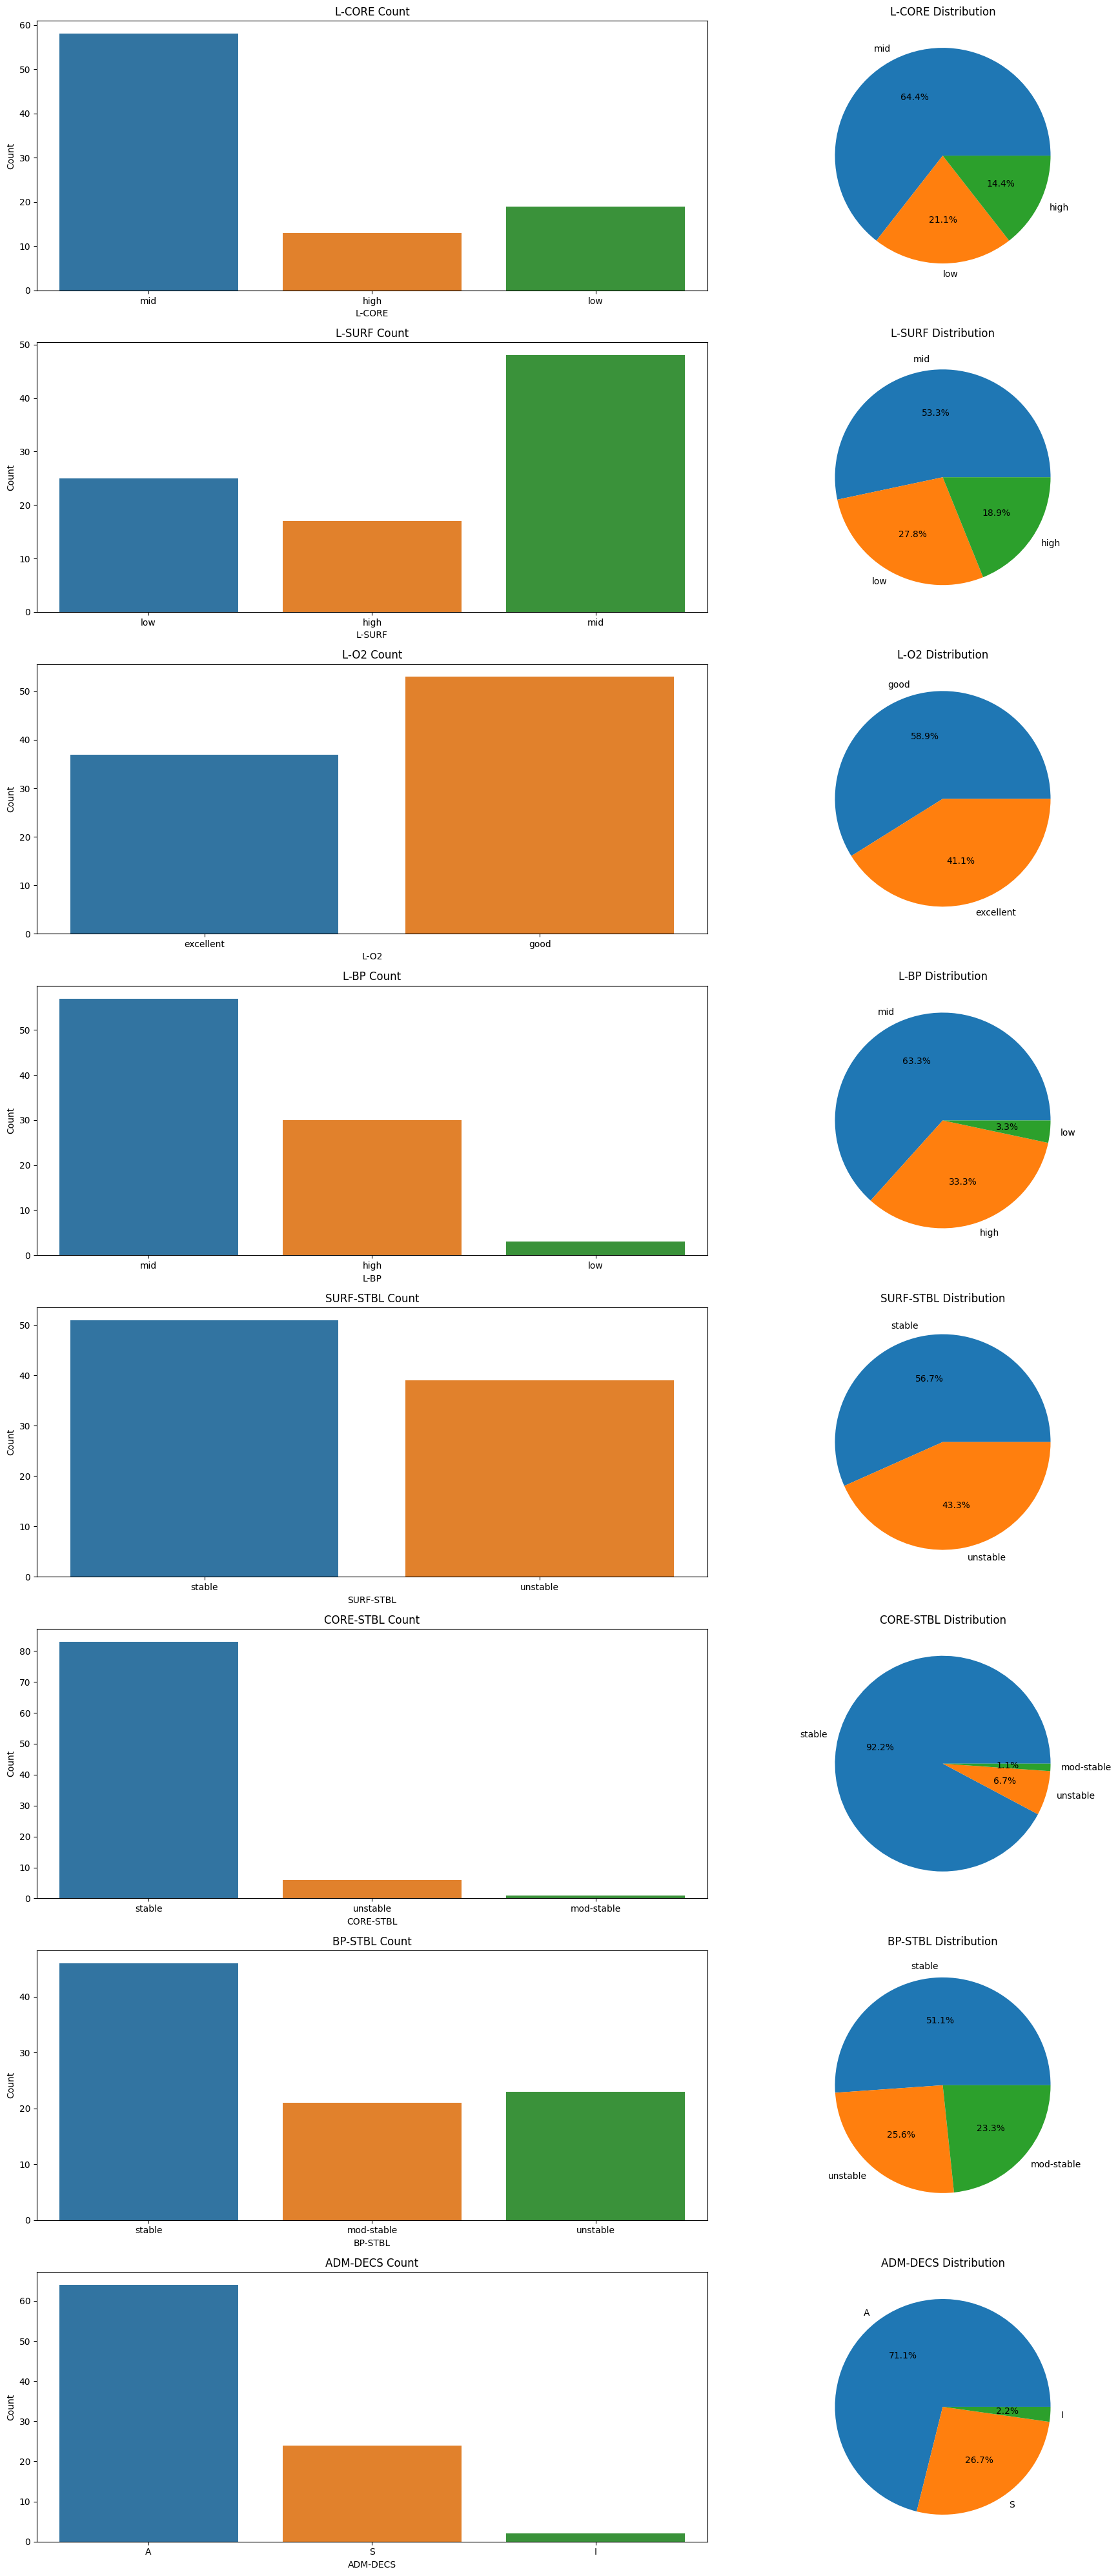

In [ ]:
plot_categorical(data, cat_cols)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
data = data_clean
# Membuat LabelEncoder instance
le = LabelEncoder()

# Menerapkan LabelEncoder pada setiap kolom kategori
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Scale fitur numerik
# scaler = StandardScaler()
# data['COMFORT'] = scaler.fit_transform(data[['COMFORT']])

# Menampilkan DataFrame setelah encoding
data

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,2,1,0,2,0,1,1,15,0
1,2,0,0,0,0,1,1,10,2
2,0,1,0,0,0,1,0,10,0
3,2,1,1,0,0,2,0,15,0
4,2,2,0,0,0,1,1,10,0
...,...,...,...,...,...,...,...,...,...
85,2,2,0,2,1,1,1,10,0
86,2,2,0,2,1,1,1,10,2
87,2,2,1,2,1,1,1,15,0
88,2,2,0,2,1,1,1,10,0


#Cek Nilai Korelasi (Heatmap)

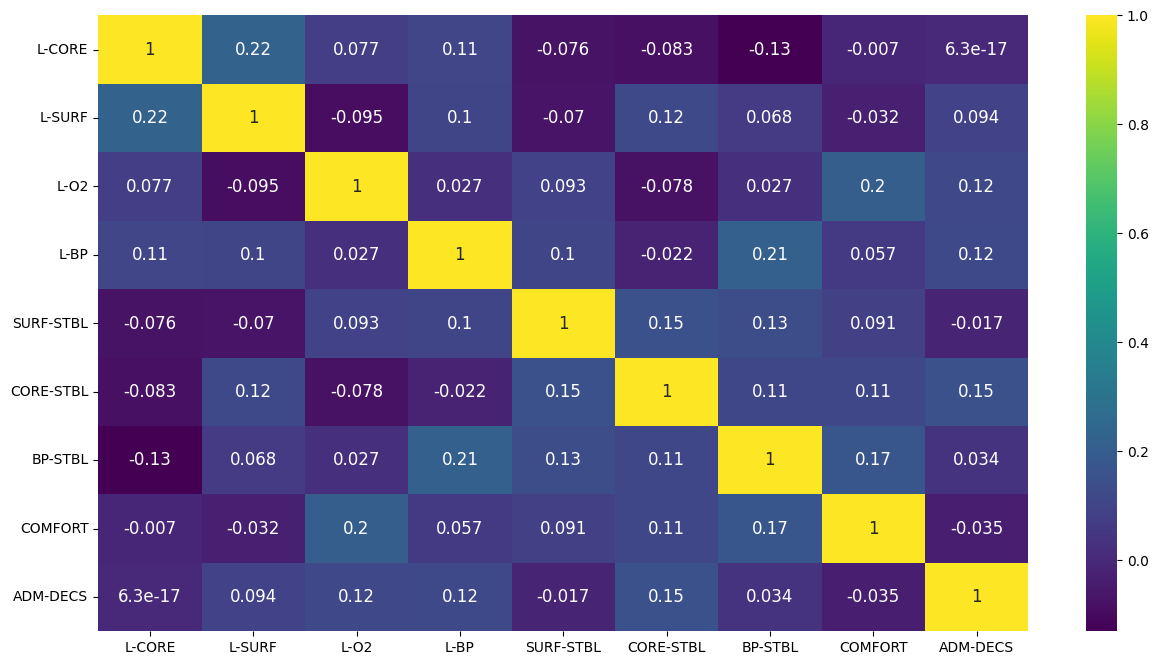

In [ ]:
matriksCorr = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(matriksCorr, cmap='viridis', annot=True, annot_kws={'fontsize': 12})

plt.show()

In [ ]:
# Informasi dataset
data.info() # memberikan ringkasan struktur dataset, termasuk tipe data dan jumlah nilai kosong

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   L-CORE     90 non-null     int64
 1   L-SURF     90 non-null     int64
 2   L-O2       90 non-null     int64
 3   L-BP       90 non-null     int64
 4   SURF-STBL  90 non-null     int64
 5   CORE-STBL  90 non-null     int64
 6   BP-STBL    90 non-null     int64
 7   COMFORT    90 non-null     int64
 8   ADM-DECS   90 non-null     int64
dtypes: int64(9)
memory usage: 6.5 KB


# Seleksi fitur yang bisa digunakan untuk pemodelan dan tidak perlu (drop fitur)

## Tanpa seleksi fitur

In [ ]:
# Memisahkan fitur (X) dan target (y) dalam dataset
X = data.drop("ADM-DECS", axis = 1)
y = data["ADM-DECS"]

print(X.shape)
print(y.shape)

(90, 8)
(90,)


Jika dilakukan seleksi/drop feature

In [ ]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 1. Correlation Matrix
def correlation_matrix(X, y):
    df = X.copy()
    df['Target'] = y
    correlation = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()


# 2. Recursive Feature Elimination (RFE)
def rfe_feature_selection(X, y, n_features_to_select=5):
    model = LinearRegression()
    selector = RFE(model, n_features_to_select=n_features_to_select)
    selector.fit(X, y)

    # Ambil nama fitur dari DataFrame X
    selected_features = X.columns[selector.support_]

    # Tampilkan fitur yang dipilih
    print("Fitur yang dipilih:")
    print(selected_features.to_list())

    return selector


# Lasso Regression for Feature Selection
def lasso_feature_selection(X, y, alpha=0.01):
    # Scaling the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Lasso model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)

    # Create a DataFrame with feature names and coefficients
    lasso_results = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': lasso.coef_
    })

    # Filter out the features with non-zero coefficients (selected features)
    selected_features = lasso_results[lasso_results['Coefficient'] != 0]

    # Display the selected features
    print("Fitur yang dipilih oleh Lasso Regression:")
    print(selected_features[['Feature', 'Coefficient']].to_string(index=False))

    return lasso

    # Random Forest for Feature Importance
def random_forest_feature_importance(X, y, n_estimators=100):
    # Random Forest model
    rf_model = RandomForestRegressor(n_estimators=n_estimators)
    rf_model.fit(X, y)

    # Create a DataFrame with feature names and importance scores
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Display the feature importance in descending order
    print("Fitur berdasarkan pentingnya dari Random Forest:")
    print(feature_importance.to_string(index=False))

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance from Random Forest')
    plt.gca().invert_yaxis()
    plt.show()

    return feature_importance

1. Korelasi Matriks:


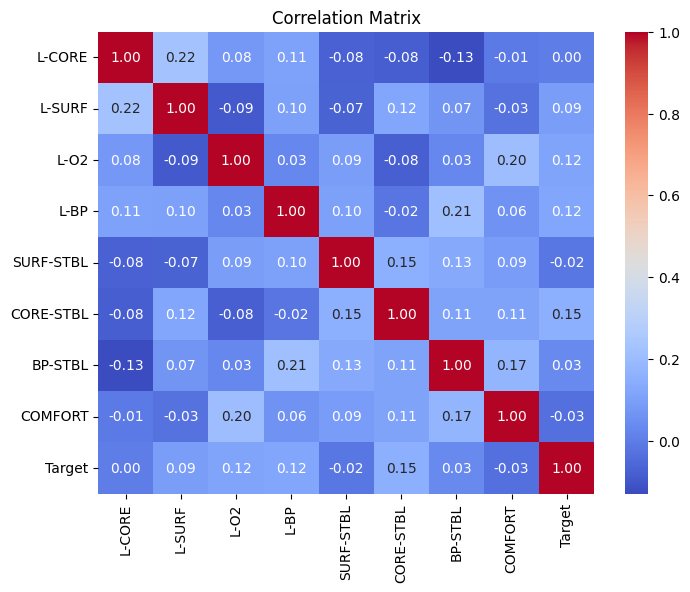


2. Recursive Feature Elimination (RFE)::
Fitur yang dipilih:
['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL', 'COMFORT']

3. Lasso Regression (L1 Regularization):
Fitur yang dipilih oleh Lasso Regression:
  Feature  Coefficient
   L-CORE    -0.014566
   L-SURF     0.056288
     L-O2     0.123556
     L-BP     0.099788
SURF-STBL    -0.038950
CORE-STBL     0.137657
  COMFORT    -0.061633

4. Feature Importance (Random Forest Regressor):
Fitur berdasarkan pentingnya dari Random Forest:
  Feature  Importance
  BP-STBL    0.204824
   L-SURF    0.183840
  COMFORT    0.143862
   L-CORE    0.130198
SURF-STBL    0.097015
     L-BP    0.096583
     L-O2    0.080150
CORE-STBL    0.063528


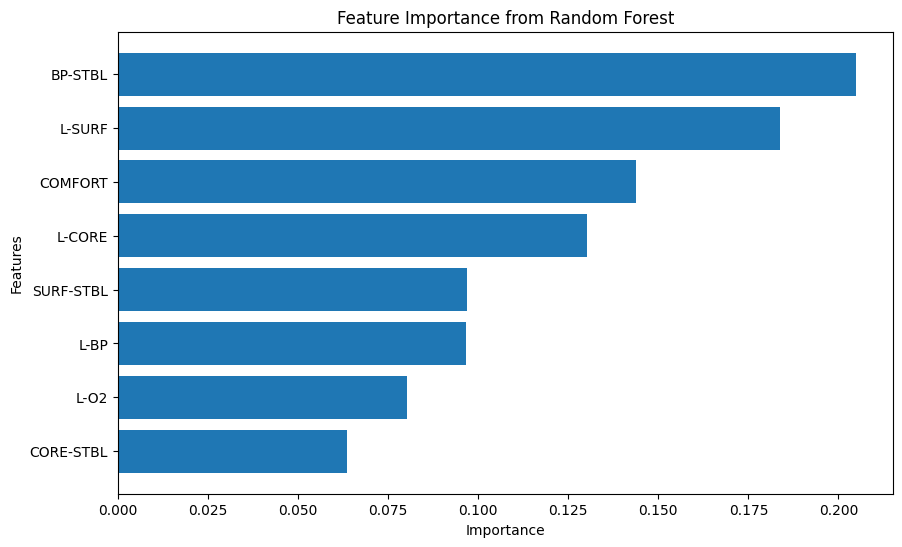

,Feature,Importance
6,BP-STBL,0.204824
1,L-SURF,0.183840
7,COMFORT,0.143862
0,L-CORE,0.130198
4,SURF-STBL,0.097015
3,L-BP,0.096583
2,L-O2,0.080150
5,CORE-STBL,0.063528


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_regression
from sklearn.linear_model import LinearRegression, Lasso

# Menampilkan hasil dari setiap metode
print("1. Korelasi Matriks:")
correlation_matrix(X, y)

print("\n2. Recursive Feature Elimination (RFE)::")
rfe_feature_selection(X, y, n_features_to_select=8)

print("\n3. Lasso Regression (L1 Regularization):")
lasso_feature_selection(X, y, alpha=0.01)

print("\n4. Feature Importance (Random Forest Regressor):")
random_forest_feature_importance(X, y, n_estimators=100)

##Dengan Seleksi fitur

In [ ]:
# Berdasarkan pengetahuan domain atau eksplorasi, kita pilih beberapa fitur
selected_features = [
    'L-CORE',
    'L-SURF',
    'L-O2',
    'L-BP',
    'SURF-STBL',
    'CORE-STBL',
    'BP-STBL',
    'COMFORT'
    ]

# 3. Memperbarui dataset dengan fitur-fitur yang dipilih secara manual
X = data[selected_features]
y = data["ADM-DECS"]

print(X.shape)
print(y.shape)

(90, 8)
(90,)


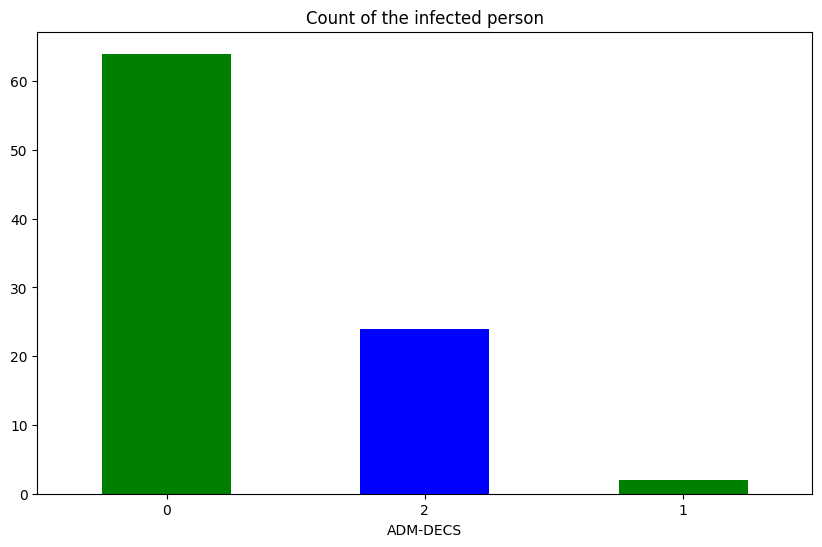

In [ ]:
# Membuat visualisasi berupa diagram batang (bar plot) yang menunjukkan jumlah individu yang termasuk dalam masing-masing kategori pada kolom infected
data['ADM-DECS'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the infected person")
plt.xticks(rotation=0);

In [ ]:
from imblearn.over_sampling import SMOTE # Library untuk membantu oversampling dengan teknik SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:

# Cek distribusi kelas sebelum SMOTE
print("Distribusi kelas sebelum SMOTE:", Counter(y))

# Cek jumlah sampel per kelas
class_counts = Counter(y)
print("Jumlah sampel per kelas:", class_counts)

# Terapkan SMOTE untuk oversampling kelas minoritas
# Kurangi k_neighbors agar tidak lebih besar dari jumlah sampel kelas minoritas
min_class_samples = min(class_counts.values())  # Menemukan kelas dengan sampel paling sedikit
k_neighbors = min(min_class_samples - 1, 3)  # Atur k_neighbors tidak lebih besar dari jumlah sampel - 1

print(f"Menetapkan k_neighbors menjadi: {k_neighbors}")


Distribusi kelas sebelum SMOTE: Counter({0: 64, 2: 24, 1: 2})
Jumlah sampel per kelas: Counter({0: 64, 2: 24, 1: 2})
Menetapkan k_neighbors menjadi: 1


In [ ]:
smote = SMOTE(k_neighbors=k_neighbors, random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y) # Mengaplikasikan oversampling pada dataset

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


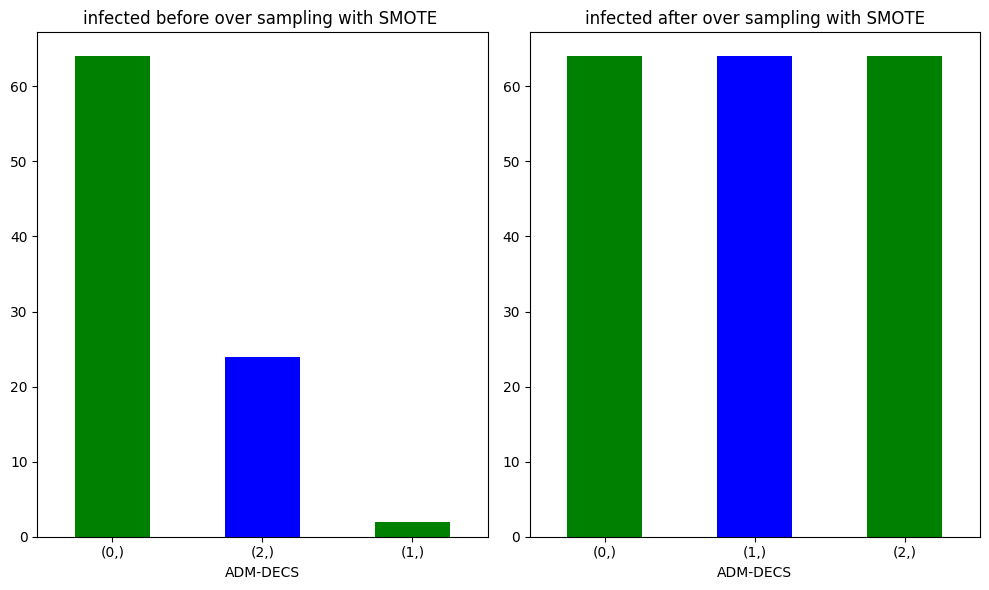

In [ ]:
plt.figure(figsize=(12, 4)) # Membuat sebuah figure (gambar) baru dengan ukuran 12x4 inci

new_df1 = pd.DataFrame(data=y) # Membuat DataFrame baru, new_df1

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("infected before over sampling with SMOTE ")
plt.xticks(rotation=0);


plt.subplot(1, 2, 2) # Membuat subplot pertama dengan layout 1 baris dan 2 kolom
new_df2 = pd.DataFrame(data=y_smote_resampled)

new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue']) # Menghitung frekuensi masing-masing kategori (0 dan 1), membuat diagram batang (bar plot) berdasarkan frekuensi kategori
plt.title("infected after over sampling with SMOTE") # Memberikan judul pada subplot pertama
plt.xticks(rotation=0); # Menetapkan label sumbu-x (kategori 0 dan 1) untuk tetap dalam posisi horizontal

plt.tight_layout() # Mengatur layout agar subplot tidak saling tumpang tindih
plt.show() # Menampilkan kedua plot dalam satu figure

#Splitting datasets
Lakukan pembagian data menjadi latih dan data testing

In [ ]:
from sklearn.model_selection import train_test_split # Library untuk membantu memisahkan data menjadi dataset latih dan dataset validasi
X_train, X_test, y_train, y_test = train_test_split(
    X_smote_resampled,
    y_smote_resampled,
    test_size=0.3,
    random_state=42,
    stratify=y_smote_resampled) # 70% data latih, 30% data test

# Lakukan Normalisasi / Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling
Gunakan model Decision Tree dan dapatkan parameter optimal (GridSearch / RandomizedSearch)

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

#Metrik Evaluasi
#Accuracy Score : Mengukur persentase prediksi yang benar dari total prediksi.
#Classification Report : Memberikan informasi tentang precision, recall, F1-score, dan support untuk setiap kelas.
#Confusion Matrix : Menampilkan matriks kesalahan (jumlah prediksi benar dan salah untuk tiap kelas).
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Melatih model Gaussian Naive Bayes
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred_dt = dt.predict(X_test)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred_dt)
print('Gaussian Accuracy:', round(accuracy, 2))

# Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

Gaussian Accuracy: 0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       1.00      0.95      0.97        19
           2       0.83      0.95      0.88        20

    accuracy                           0.91        58
   macro avg       0.92      0.91      0.92        58
weighted avg       0.92      0.91      0.91        58



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Parameter grid untuk Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5
)

# Melatih model
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Menampilkan model terbaik
print("Best Estimator:", grid_search.best_estimator_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(random_state=42)


In [ ]:
# Mendapatkan parameter terbaik dari grid search
best_params = grid_search.best_params_

# Membuat model RandomForest dengan parameter terbaik
best_dt = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=None,
    random_state=42
)


# Melatih model dengan data pelatihan
best_dt.fit(X_train, y_train)

# Melakukan prediksi dengan model yang sudah dilatih
y_pred_best_train = best_dt.predict(X_train)
y_pred_best_dt = best_dt.predict(X_test)

# Menghitung akurasi model
from sklearn.metrics import accuracy_score, classification_report

# Menampilkan akurasi
print("Train Accuracy of Best Random Forest Model:", accuracy_score(y_train, y_pred_best_train))
# Menampilkan akurasi
print("Accuracy of Best Random Forest Model:", accuracy_score(y_test, y_pred_best_dt))

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_dt))


Train Accuracy of Best Random Forest Model: 0.9328358208955224
Accuracy of Best Random Forest Model: 0.896551724137931

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       1.00      0.95      0.97        19
           2       0.82      0.90      0.86        20

    accuracy                           0.90        58
   macro avg       0.90      0.90      0.90        58
weighted avg       0.90      0.90      0.90        58



### Analisis Akurasi, Presisi, dan Recall:
**Definisi**:
- **Akurasi**: Persentase prediksi benar dibandingkan total prediksi.
- **Presisi**: Persentase prediksi benar terhadap total prediksi positif per kelas.
- **Recall**: Persentase prediksi benar terhadap total kasus aktual per kelas.

#### Rumus:
**Akurasi**:

    Akurasi = Total Prediksi Benar / Total Data

**Presisi Per Kelas:**

    Presisi = True Positive (TP) / (True Positive (TP) + False Positive (FP))

**Recall Per Kelas:**

    Recall = True Positive (TP) / (True Positive (TP) + False Negative (FN))



#confusion matrix

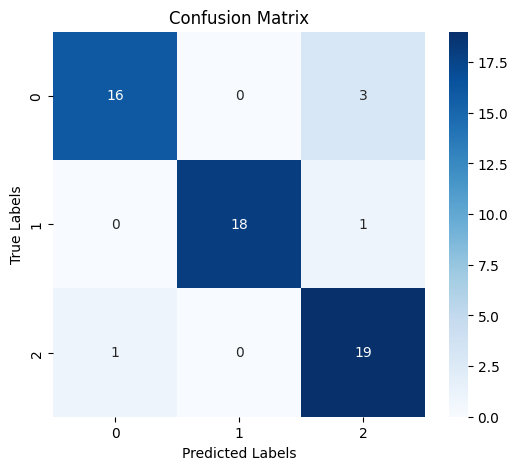

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Menghitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

classes = np.unique(np.concatenate([y_test, y_pred_dt]))

# 2. Membuat visualisasi Confusion Matrix menggunakan Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Penjelasan Hasil Confusion Matrix:
- **True Labels (0)**:
  - Prediksi benar: 16 (benar diprediksi sebagai 0).
  - Kesalahan: 3 (diprediksi sebagai 2).
- **True Labels (1)**:
  - Prediksi benar: 18 (benar diprediksi sebagai 1).
  - Kesalahan: 1 (diprediksi sebagai 2).
- **True Labels (2)**:
  - Prediksi benar: 19 (benar diprediksi sebagai 2).
  - Kesalahan: 1 (diprediksi sebagai 0).

Hasil ini menunjukkan bahwa model memiliki akurasi yang baik dalam mengklasifikasikan label 1 dan 2, dengan kesalahan minor pada label 0 yang sering salah prediksi.

